<a href="https://colab.research.google.com/github/am610/SN_lsst_analysis/blob/main/Ayan/1_PEDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Ayan Mitra 2023

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install astroNN

In [3]:
#!git clone https://github.com/igomezv/nnogada.git

In [4]:
#sys.path.append("/content/nnogada/")
#from nnogada import Nnogada
#%cd /content/nnogada/
#!pip install -e .

In [5]:
#!python /content/nnogada/setup.py egg_info


In [6]:
#sys.path.append("/content/nnogada/")
#from nnogada.main import Nnogada

In [7]:
import time
import sys

import numpy as np
import pandas as pd
from scipy.misc import derivative
import scipy.integrate as intg
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
# from tensorflow.keras.initializers import Constant, RandomNormal

from sklearn.metrics import mean_squared_error
from astroNN.nn.layers import MCDropout

#sys.path.append("/content/nnogada/")
#from nnogada import Nnogada

<ipython-input-8-8435f9fc5c63>:16: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(dL) + 25


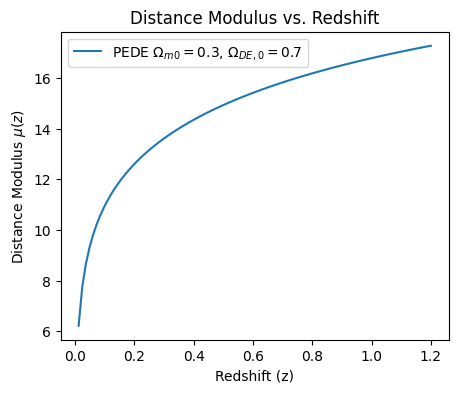

In [8]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def H_z(z, H0, Omega_m0, Omega_DE0):
    term1 = Omega_m0 * (1 + z)**3
    term2 = Omega_DE0 * (1 - np.tanh(np.log10(1 + z)))
    return H0 * np.sqrt(term1 + term2)

def luminosity_distance(z, H0, Omega_m0, Omega_DE0):
    integral, _ = quad(lambda z_prime: 1/H_z(z_prime, H0, Omega_m0, Omega_DE0), 0, z)
    return (1 + z) * integral

def mu(z, H0, Omega_m0, Omega_DE0):
    dL = luminosity_distance(z, H0, Omega_m0, Omega_DE0)
    return 5 * np.log10(dL) + 25

# Parameters
H0 = 70  # Hubble constant in km/s/Mpc
Omega_m0 = 0.3  # Example value for matter density today
Omega_DE0 = 0.7  # Example value for dark energy density today

# Create an array of redshift values
z_values = np.linspace(0, 1.2, 100)
mu_values = [mu(z, H0, Omega_m0, Omega_DE0) for z in z_values]

# Plotting
plt.figure(figsize=(5,4))
plt.plot(z_values, mu_values, label=f'PEDE $\Omega_{{m0}}={Omega_m0}$, $\Omega_{{DE,0}}={Omega_DE0}$')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus $\mu(z)$')
plt.title('Distance Modulus vs. Redshift')
plt.legend()
#plt.grid(True)
plt.show()


<ipython-input-9-ef1584b1ee10>:29: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(dL) + 25


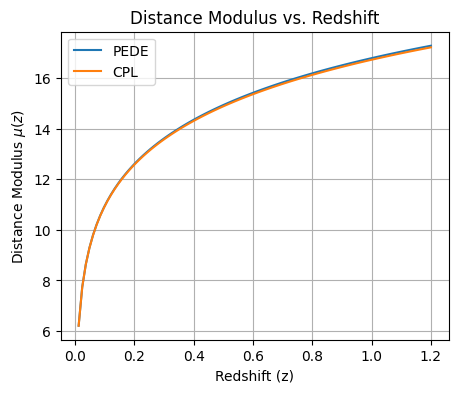

In [9]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Functions for PEDE model
def H_z_PEDE(z, H0, Omega_m0, Omega_DE0):
    term1 = Omega_m0 * (1 + z)**3
    term2 = Omega_DE0 * (1 - np.tanh(np.log10(1 + z)))
    return H0 * np.sqrt(term1 + term2)

# Functions for CPL model
def w_CPL(z, w0, wa):
    return w0 + wa * z / (1 + z)

def H_z_CPL(z, H0, Omega_m0, Omega_DE0, w0, wa):
    term1 = Omega_m0 * (1 + z)**3
    term2 = Omega_DE0 * (1 + z)**(3 * (1 + w_CPL(z, w0, wa)))
    return H0 * np.sqrt(term1 + term2)

def luminosity_distance(z, H0, Omega_m0, Omega_DE0, model='PEDE', w0=None, wa=None):
    if model == 'PEDE':
        integral, _ = quad(lambda z_prime: 1/H_z_PEDE(z_prime, H0, Omega_m0, Omega_DE0), 0, z)
    elif model == 'CPL':
        integral, _ = quad(lambda z_prime: 1/H_z_CPL(z_prime, H0, Omega_m0, Omega_DE0, w0, wa), 0, z)
    return (1 + z) * integral

def mu(z, H0, Omega_m0, Omega_DE0, model='PEDE', w0=None, wa=None):
    dL = luminosity_distance(z, H0, Omega_m0, Omega_DE0, model, w0, wa)
    return 5 * np.log10(dL) + 25

# Parameters
H0 = 70  # Hubble constant in km/s/Mpc
Omega_m0 = 0.3  # Example value for matter density today
Omega_DE0 = 0.7  # Example value for dark energy density today
w0 = -1.0  # Example value for w0 in CPL model
wa = 0.0  # Example value for wa in CPL model

# Create an array of redshift values
z_values = np.linspace(0, 1.2, 100)
mu_PEDE_values = [mu(z, H0, Omega_m0, Omega_DE0, model='PEDE') for z in z_values]
mu_CPL_values = [mu(z, H0, Omega_m0, Omega_DE0, model='CPL', w0=w0, wa=wa) for z in z_values]

# Plotting
plt.figure(figsize=(5,4))
plt.plot(z_values, mu_PEDE_values, label='PEDE')
plt.plot(z_values, mu_CPL_values, label='CPL')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus $\mu(z)$')
plt.title('Distance Modulus vs. Redshift')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-10-9965adc8cc7e>:37: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(dL) + 25


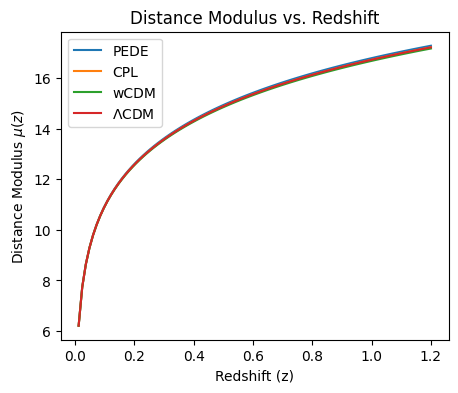

In [10]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Functions for PEDE model
def H_z_PEDE(z, H0, Omega_m0, Omega_DE0):
    term1 = Omega_m0 * (1 + z)**3
    term2 = Omega_DE0 * (1 - np.tanh(np.log10(1 + z)))
    return H0 * np.sqrt(term1 + term2)

# Functions for CPL model
def w_CPL(z, w0, wa):
    return w0 + wa * z / (1 + z)

def H_z_CPL(z, H0, Omega_m0, Omega_DE0, w0, wa):
    term1 = Omega_m0 * (1 + z)**3
    term2 = Omega_DE0 * (1 + z)**(3 * (1 + w_CPL(z, w0, wa)))
    return H0 * np.sqrt(term1 + term2)

# Functions for wCDM model
def H_z_wCDM(z, H0, Omega_m0, Omega_DE0, w):
    term1 = Omega_m0 * (1 + z)**3
    term2 = Omega_DE0 * (1 + z)**(3 * (1 + w))
    return H0 * np.sqrt(term1 + term2)

def luminosity_distance(z, H0, Omega_m0, Omega_DE0, model='PEDE', w0=None, wa=None, w=None):
    if model == 'PEDE':
        integral, _ = quad(lambda z_prime: 1/H_z_PEDE(z_prime, H0, Omega_m0, Omega_DE0), 0, z)
    elif model == 'CPL':
        integral, _ = quad(lambda z_prime: 1/H_z_CPL(z_prime, H0, Omega_m0, Omega_DE0, w0, wa), 0, z)
    elif model == 'wCDM':
        integral, _ = quad(lambda z_prime: 1/H_z_wCDM(z_prime, H0, Omega_m0, Omega_DE0, w), 0, z)
    return (1 + z) * integral

def mu(z, H0, Omega_m0, Omega_DE0, model='PEDE', w0=None, wa=None, w=None):
    dL = luminosity_distance(z, H0, Omega_m0, Omega_DE0, model, w0, wa, w)
    return 5 * np.log10(dL) + 25

# Parameters
H0 = 70  # Hubble constant in km/s/Mpc
Omega_m0 = 0.3  # Example value for matter density today
Omega_DE0 = 0.7  # Example value for dark energy density today
w0 = -1.0  # Example value for w0 in CPL model
wa = 0.0  # Example value for wa in CPL model
w = -0.9  # Example value for w in wCDM model

# Create an array of redshift values
z_values = np.linspace(0, 1.2, 100)
mu_PEDE_values = [mu(z, H0, Omega_m0, Omega_DE0, model='PEDE') for z in z_values]
mu_CPL_values = [mu(z, H0, Omega_m0, Omega_DE0, model='CPL', w0=w0, wa=wa) for z in z_values]
mu_wCDM_values = [mu(z, H0, Omega_m0, Omega_DE0, model='wCDM', w=w) for z in z_values]
mu_LambdaCDM_values = [mu(z, H0, Omega_m0, Omega_DE0, model='wCDM', w=-1) for z in z_values]


# Plotting
plt.figure(figsize=(5,4))
plt.plot(z_values, mu_PEDE_values, label='PEDE')
plt.plot(z_values, mu_CPL_values, label='CPL')
plt.plot(z_values, mu_wCDM_values, label='wCDM')
plt.plot(z_values, mu_LambdaCDM_values, label='$\Lambda$CDM')

plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus $\mu(z)$')
plt.title('Distance Modulus vs. Redshift')
plt.legend()
#plt.grid(True)
plt.show()


In [11]:
def H_z(z, H0, Omega_m0, Omega_DE0, model='PEDE', w0=None, wa=None, w=None):
    if model == 'PEDE':
        term1 = Omega_m0 * (1 + z)**3
        term2 = Omega_DE0 * (1 - np.tanh(np.log10(1 + z)))
        return H0 * np.sqrt(term1 + term2)
    elif model == 'CPL':
        term1 = Omega_m0 * (1 + z)**3
        term2 = Omega_DE0 * (1 + z)**(3 * (1 + w_CPL(z, w0, wa)))
        return H0 * np.sqrt(term1 + term2)
    elif model == 'wCDM':
        term1 = Omega_m0 * (1 + z)**3
        term2 = Omega_DE0 * (1 + z)**(3 * (1 + w))
        return H0 * np.sqrt(term1 + term2)

def dL(z, H0, Omega_m0, Omega_DE0, model='PEDE', w0=None, wa=None, w=None):
    """Compute luminosity distance without the scaling factor."""
    integral, _ = quad(lambda z_prime: 1/H_z(z_prime, H0, Omega_m0, Omega_DE0, model, w0, wa, w), 0, z)
    return integral

def RMSE(dL_values1, dL_values2):
    return np.sqrt(np.mean((dL_values1 - dL_values2)**2))

def MAPE(dL_values1, dL_values2):
    non_zero_mask = dL_values1 != 0  # Mask to avoid division by zero
    return 100 * np.mean(np.abs((dL_values1[non_zero_mask] - dL_values2[non_zero_mask]) / dL_values1[non_zero_mask]))

def MaxDiff(dL_values1, dL_values2):
    return np.max(np.abs(dL_values1 - dL_values2))


# Parameters
H0 = 70  # Hubble constant in km/s/Mpc
Omega_m0 = 0.3  # Example value for matter density today
Omega_DE0 = 0.7  # Example value for dark energy density today
w0 = -1.0  # Example value for w0 in CPL model
wa = 0.0  # Example value for wa in CPL model
w = -0.9  # Example value for w in wCDM model

# Create an array of redshift values
z_values = np.linspace(0, 1.2, 100)

# Now let's recompute the differences
dL_PEDE_values = [dL(z, H0, Omega_m0, Omega_DE0, model='PEDE') for z in z_values]
dL_CPL_values = [dL(z, H0, Omega_m0, Omega_DE0, model='CPL', w0=w0, wa=wa) for z in z_values]
dL_wCDM_values = [dL(z, H0, Omega_m0, Omega_DE0, model='wCDM', w=w) for z in z_values]
dL_LambdaCDM_values = [dL(z, H0, Omega_m0, Omega_DE0, model='wCDM', w=-1) for z in z_values]


# Compute RMSE, MAPE, and MaxDiff for each pair of models
rmse_PEDE_CPL = RMSE(np.array(dL_PEDE_values), np.array(dL_CPL_values))
mape_PEDE_CPL = MAPE(np.array(dL_PEDE_values), np.array(dL_CPL_values))
maxdiff_PEDE_CPL = MaxDiff(np.array(dL_PEDE_values), np.array(dL_CPL_values))

rmse_PEDE_wCDM = RMSE(np.array(dL_PEDE_values), np.array(dL_wCDM_values))
mape_PEDE_wCDM = MAPE(np.array(dL_PEDE_values), np.array(dL_wCDM_values))
maxdiff_PEDE_wCDM = MaxDiff(np.array(dL_PEDE_values), np.array(dL_wCDM_values))

rmse_PEDE_LambdaCDM = RMSE(np.array(dL_PEDE_values), np.array(dL_LambdaCDM_values))
mape_PEDE_LambdaCDM = MAPE(np.array(dL_PEDE_values), np.array(dL_LambdaCDM_values))
maxdiff_PEDE_LambdaCDM = MaxDiff(np.array(dL_PEDE_values), np.array(dL_LambdaCDM_values))

rmse_CPL_wCDM = RMSE(np.array(dL_CPL_values), np.array(dL_wCDM_values))
mape_CPL_wCDM = MAPE(np.array(dL_CPL_values), np.array(dL_wCDM_values))
maxdiff_CPL_wCDM = MaxDiff(np.array(dL_CPL_values), np.array(dL_wCDM_values))

rmse_CPL_LambdaCDM = RMSE(np.array(dL_CPL_values), np.array(dL_LambdaCDM_values))
mape_CPL_LambdaCDM = MAPE(np.array(dL_CPL_values), np.array(dL_LambdaCDM_values))
maxdiff_CPL_LambdaCDM = MaxDiff(np.array(dL_CPL_values), np.array(dL_LambdaCDM_values))

rmse_wCDM_LambdaCDM = RMSE(np.array(dL_wCDM_values), np.array(dL_LambdaCDM_values))
mape_wCDM_LambdaCDM = MAPE(np.array(dL_wCDM_values), np.array(dL_LambdaCDM_values))
maxdiff_wCDM_LambdaCDM = MaxDiff(np.array(dL_wCDM_values), np.array(dL_LambdaCDM_values))

results = {
    "PEDE vs CPL": (rmse_PEDE_CPL, mape_PEDE_CPL, maxdiff_PEDE_CPL),
    "PEDE vs wCDM": (rmse_PEDE_wCDM, mape_PEDE_wCDM, maxdiff_PEDE_wCDM),
    "PEDE vs LambdaCDM": (rmse_PEDE_LambdaCDM, mape_PEDE_LambdaCDM, maxdiff_PEDE_LambdaCDM),
    "CPL vs wCDM": (rmse_CPL_wCDM, mape_CPL_wCDM, maxdiff_CPL_wCDM),
    "CPL vs LambdaCDM": (rmse_CPL_LambdaCDM, mape_CPL_LambdaCDM, maxdiff_CPL_LambdaCDM),
    "wCDM vs LambdaCDM": (rmse_wCDM_LambdaCDM, mape_wCDM_LambdaCDM, maxdiff_wCDM_LambdaCDM)
}

results


{'PEDE vs CPL': (0.00022189745346494822,
  2.1886588574950028,
  0.0003774346145779487),
 'PEDE vs wCDM': (0.00037341203801462795,
  3.6750472731816344,
  0.0006384344075988022),
 'PEDE vs LambdaCDM': (0.00022189745346494822,
  2.1886588574950028,
  0.0003774346145779487),
 'CPL vs wCDM': (0.00015151801376735402,
  1.5242448168112588,
  0.00026099979302085345),
 'CPL vs LambdaCDM': (0.0, 0.0, 0.0),
 'wCDM vs LambdaCDM': (0.00015151801376735402,
  1.551163537549203,
  0.00026099979302085345)}

In [12]:
import pandas as pd

# Use the values from the computed 'results' dictionary to populate the DataFrame
data = {
    "Model Comparison": list(results.keys()),
    "RMSE": [results[key][0] for key in results],
    "MAPE (%)": [results[key][1] for key in results],
    "Max Difference": [results[key][2] for key in results]
}

df = pd.DataFrame(data)
df


,Model Comparison,RMSE,MAPE (%),Max Difference
0,PEDE vs CPL,0.000222,2.188659,0.000377
1,PEDE vs wCDM,0.000373,3.675047,0.000638
2,PEDE vs LambdaCDM,0.000222,2.188659,0.000377
3,CPL vs wCDM,0.000152,1.524245,0.000261
4,CPL vs LambdaCDM,0.000000,0.000000,0.000000
5,wCDM vs LambdaCDM,0.000152,1.551164,0.000261


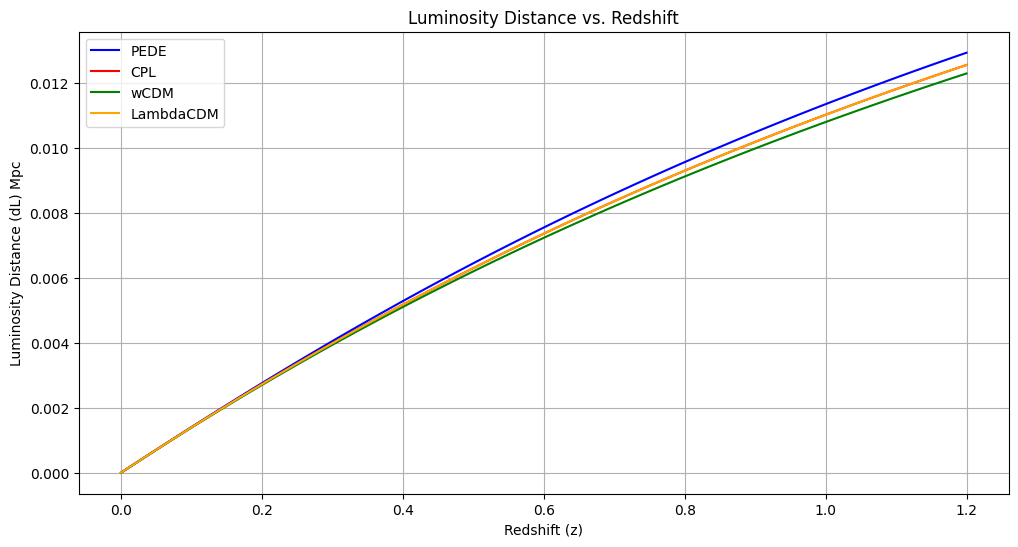

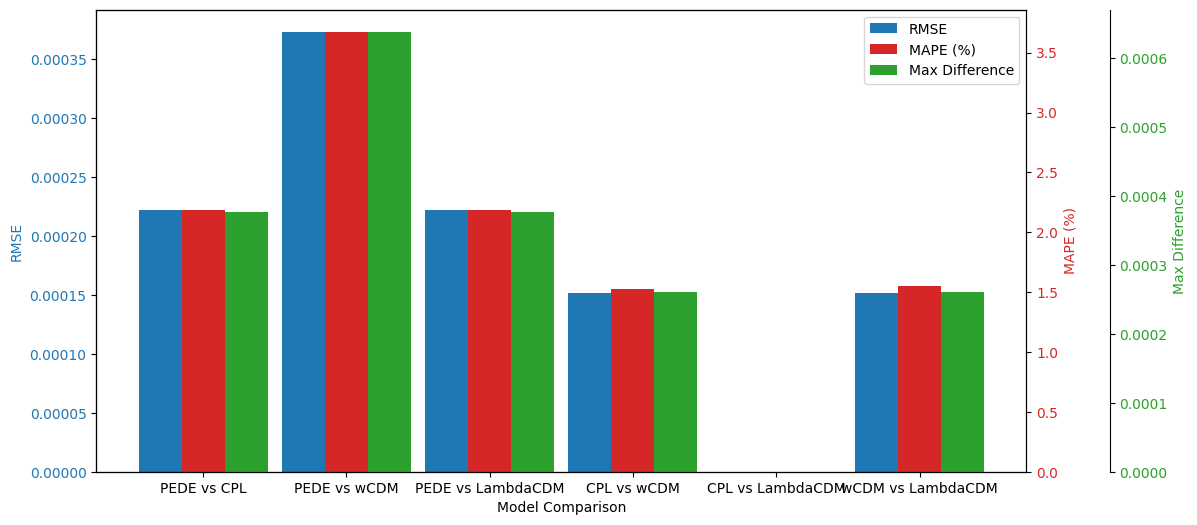

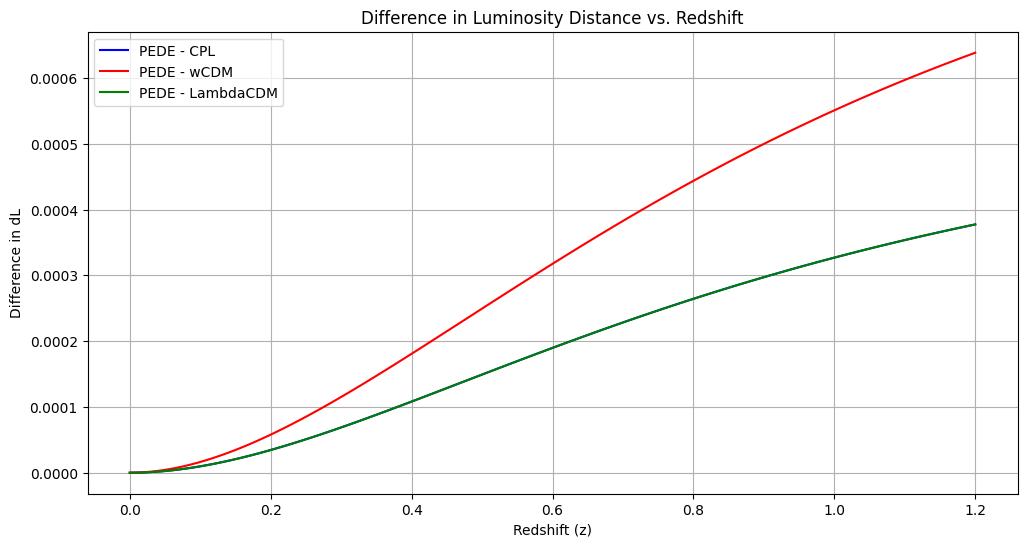

In [13]:
import matplotlib.pyplot as plt

# 1. Plotting dL(z) for Different Models
plt.figure(figsize=(12, 6))
plt.plot(z_values, dL_PEDE_values, label='PEDE', color='blue')
plt.plot(z_values, dL_CPL_values, label='CPL', color='red')
plt.plot(z_values, dL_wCDM_values, label='wCDM', color='green')
plt.plot(z_values, dL_LambdaCDM_values, label='LambdaCDM', color='orange')
plt.xlabel('Redshift (z)')
plt.ylabel('Luminosity Distance (dL) Mpc')
plt.title('Luminosity Distance vs. Redshift')
plt.legend()
plt.grid(True)
plt.show()

# 2. Bar Plots of Error Metrics
labels = list(results.keys())
rmse_values = [results[key][0] for key in results]
mape_values = [results[key][1] for key in results]
maxdiff_values = [results[key][2] for key in results]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Model Comparison')
ax1.set_ylabel('RMSE', color=color)
ax1.bar(x - width, rmse_values, width, label='RMSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('MAPE (%)', color=color)
ax2.bar(x, mape_values, width, label='MAPE (%)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
color = 'tab:green'
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Max Difference', color=color)
ax3.bar(x + width, maxdiff_values, width, label='Max Difference', color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Added these three lines to make the legend work
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc=0)

plt.show()

# 3. Difference Plots
plt.figure(figsize=(12, 6))
plt.plot(z_values, np.array(dL_PEDE_values) - np.array(dL_CPL_values), label='PEDE - CPL', color='blue')
plt.plot(z_values, np.array(dL_PEDE_values) - np.array(dL_wCDM_values), label='PEDE - wCDM', color='red')
plt.plot(z_values, np.array(dL_PEDE_values) - np.array(dL_LambdaCDM_values), label='PEDE - LambdaCDM', color='green')
plt.xlabel('Redshift (z)')
plt.ylabel('Difference in dL')
plt.title('Difference in Luminosity Distance vs. Redshift')
plt.legend()
plt.grid(True)
plt.show()
